In [7]:
"""
allToAllGLOSIM.ipynb
Given a list of pdbrefs and chainrefs, perform the community detection on the relevant files. 
Write out a directory of pdb fragments (that code already exists somewhere). 
^^ Do this outside the container, as proteinnetworks is in Python 3
Remove everything that isn't an alpha-C.
Write the whole whole to an xyz file.
Run glosim on the xyz file.
Run the similarities, perform hierarchical clustering
Check the match to SCOP.
"""
import quippy
import ase
from ase.atoms import Atoms as AseAtoms 

In [8]:
# Get similarities for all test proteins
with open("pdbFragments.txt") as flines:
    proteinPaths = ["pdbFragments/" +line.strip() for line in flines]
proteins = []
for proteinPath in proteinPaths:
    proteins.append(quippy.Atoms(ase.io.read(proteinPath, format='proteindatabank')))


In [9]:
testFamily = quippy.AtomsList(proteins)
testFamily.write("testFamily.xyz")


In [11]:
!python /usr/local/src/glosim/glosim.py --kernel rematch -n 10 -l 10 -c 15 -g 1.5 --gamma 0.01 --np 4 /root/allToAllGLOSIMCheck/testFamily.xyz # Choose parameters carefully

          TIME:   Wed Jul  4 17:19:34 2018
        ___  __    _____  ___  ____  __  __ 
       / __)(  )  (  _  )/ __)(_  _)(  \/  )
      ( (_-. )(__  )(_)( \__ \ _)(_  )    ( 
       \___/(____)(_____)(___/(____)(_/\/\_)
                                            
                                             
using output prefix = /root/allToAllGLOSIMCheck/testFamily-n10-l10-c15.0-g1.5_rematch-0.01
Reading input file /root/allToAllGLOSIMCheck/testFamily.xyz
156  Configurations Read
Computing SOAPs
Computing kernel matrix                
Matrix row 1 153    
 ============= Glosim Ended Successfully ============== 
          TIME:   Wed Jul  4 17:32:33 2018
          Duration: 0:12:58.038656


In [13]:
def plotKernelMatrix(inputArray):
    import palettable
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    data = np.array(inputArray,dtype=float)
    print(data)
    cmap = palettable.cubehelix.purple_16.mpl_colormap
    sns.heatmap(data, vmin=0, vmax=1,cmap=cmap)
    plt.show()
    


[[1.         0.81524159 0.8355296  ... 0.63325307 0.551746   0.53452139]
 [0.81524159 1.         0.96066994 ... 0.77275168 0.67274387 0.64969966]
 [0.8355296  0.96066994 1.         ... 0.73976644 0.63985785 0.61850058]
 ...
 [0.63325307 0.77275168 0.73976644 ... 1.         0.83605156 0.84693944]
 [0.551746   0.67274387 0.63985785 ... 0.83605156 1.         0.90788269]
 [0.53452139 0.64969966 0.61850058 ... 0.84693944 0.90788269 1.        ]]


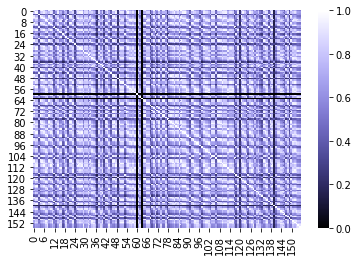

In [37]:
with open("testFamily-n10-l10-c15.0-g1.5_rematch-0.01.k") as flines:
    glosimData = [line.strip() for line in flines][1:]

glosimData = np.asarray([line.split() for line in glosimData], dtype=float)
# strip nans
glosimData = np.nan_to_num(glosimData)
plotKernelMatrix(glosimData)


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

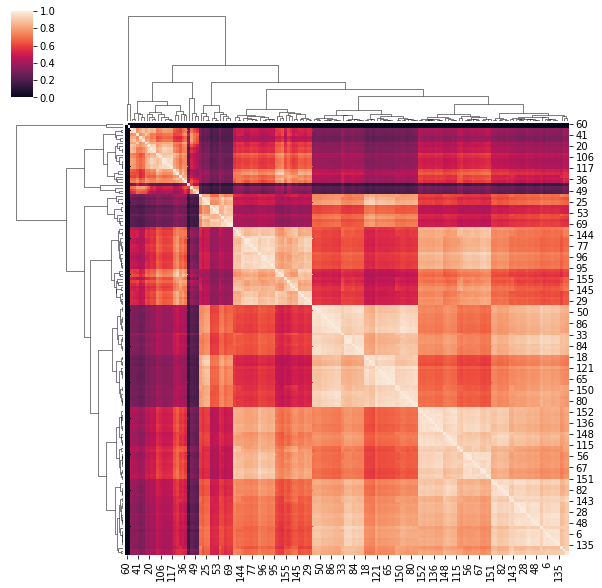

In [38]:

g = sns.clustermap(glosimData)

In [84]:
print(glosimData) 
with open("pdbFragments.txt") as flines:
    proteinPaths = [line.strip().split(".")[0] for line in flines]

df = pd.DataFrame(glosimData, columns=proteinPaths)
# dictSwap = {i: x for i,x in enumerate(proteinPaths)}
# df.rename(index=dictSwap, inplace=True)
df.head()


[[1.         0.81524159 0.8355296  0.36658082 0.91742557 0.96506724
  0.88166895 0.68038821 0.60237286 0.94683069 0.87155559 0.72774302
  0.3828409  0.77535203 0.86229695 0.55365583 0.61843704 0.62308593
  0.87850726 0.6213803  0.34778532 0.94191432 0.97224454 0.71964676
  0.28423295 0.8088309  0.88056054 0.80031093 0.8379403  0.56419293
  0.83742399 0.83787706 0.56711274 0.93248475 0.69683453 0.60995126
  0.44476063 0.24162441 0.89292255 0.51885531 0.69638705 0.31239857
  0.91011453 0.92049428 0.56972996 0.35939668 0.97942454 0.95307507
  0.85142024 0.22448107 0.96076098 0.75663505 0.74956963 0.62600763
  0.97685401 0.81840181 0.69575128 0.64792367 0.73994972 0.61449078
  0.         0.78910913 0.51667005 0.         0.86379584 0.91407498
  0.70008444 0.70318722 0.3259855  0.68995881 0.96601556 0.53575975
  0.69184208 0.98324326 0.50588368 0.91815142 0.90952592 0.59764754
  0.29669766 0.81692088 0.94306061 0.94794918 0.78960094 0.92160609
  0.93751977 0.60839239 0.98430982 0.85037528 0.

,1bli_A_1,1bli_A_2,1bli_A_3,1bli_A_4,1cxl_A_1,1cxl_A_2,1cxl_A_3,1cxl_A_4,1cxl_A_5,1e43_A_1,...,2je8_A_6,2pi6_A_1,2pi6_A_2,2pi6_A_3,3bmv_A_1,3bmv_A_2,3bmv_A_3,3bmv_A_4,3bmv_A_5,3bmv_A_6
0,1.000000,0.815242,0.835530,0.366581,0.917426,0.965067,0.881669,0.680388,0.602373,0.946831,...,0.416898,0.856958,0.750609,0.319356,0.927436,0.677337,0.736109,0.633253,0.551746,0.534521
1,0.815242,1.000000,0.960670,0.443843,0.746109,0.839992,0.917415,0.828764,0.733571,0.776545,...,0.509584,0.694897,0.907902,0.385551,0.761402,0.829691,0.899580,0.772752,0.672744,0.649700
2,0.835530,0.960670,1.000000,0.410137,0.768139,0.861134,0.939294,0.799345,0.704385,0.796914,...,0.460714,0.716974,0.883756,0.350193,0.780927,0.793532,0.866990,0.739766,0.639858,0.618501
3,0.366581,0.443843,0.410137,1.000000,0.333406,0.376102,0.409593,0.510222,0.568161,0.349304,...,0.743211,0.310910,0.450486,0.837031,0.338639,0.521596,0.495219,0.539538,0.621126,0.592006
4,0.917426,0.746109,0.768139,0.333406,1.000000,0.894709,0.808421,0.620944,0.548710,0.959999,...,0.375752,0.931338,0.687201,0.290027,0.939796,0.617338,0.670929,0.576190,0.501817,0.486473


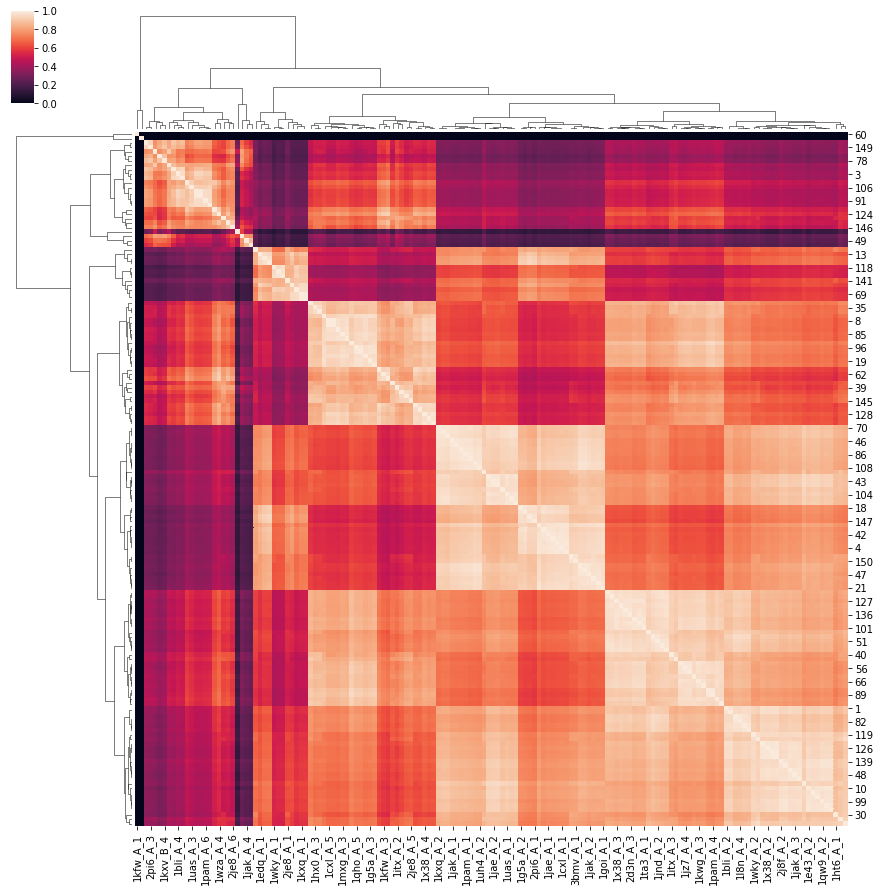

In [85]:
g = sns.clustermap(df, yticklabels="auto", figsize=(15,15))

In [67]:
g.savefig("clustering.pdf", dpi=300)
g.savefig("clustering.png", dpi=300)

In [86]:
g.dendrogram_col.linkage

array([[8.00000000e+00, 9.00000000e+01, 5.05446407e-03, 2.00000000e+00],
       [6.90000000e+01, 7.20000000e+01, 1.94260212e-02, 2.00000000e+00],
       [1.20000000e+01, 1.37000000e+02, 2.48387516e-02, 2.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 2.84258895e-02, 2.00000000e+00],
       [4.60000000e+01, 5.40000000e+01, 2.87699473e-02, 2.00000000e+00],
       [1.11000000e+02, 1.35000000e+02, 2.91491796e-02, 2.00000000e+00],
       [4.00000000e+00, 7.50000000e+01, 2.99326605e-02, 2.00000000e+00],
       [0.00000000e+00, 8.60000000e+01, 3.11883568e-02, 2.00000000e+00],
       [5.00000000e+00, 5.00000000e+01, 3.45554020e-02, 2.00000000e+00],
       [6.00000000e+00, 2.60000000e+01, 3.57008603e-02, 2.00000000e+00],
       [6.10000000e+01, 8.20000000e+01, 3.67934821e-02, 2.00000000e+00],
       [1.26000000e+02, 1.59000000e+02, 4.29949538e-02, 3.00000000e+00],
       [9.20000000e+01, 1.34000000e+02, 4.41784378e-02, 2.00000000e+00],
       [4.20000000e+01, 7.60000000e+01, 4.44864985e

In [87]:
from scipy.cluster import hierarchy
row_linkage = hierarchy.linkage(df, method='average')


In [88]:
print(row_linkage)

[[8.00000000e+00 9.00000000e+01 5.05446407e-03 2.00000000e+00]
 [6.90000000e+01 7.20000000e+01 1.94260212e-02 2.00000000e+00]
 [1.20000000e+01 1.37000000e+02 2.48387516e-02 2.00000000e+00]
 [2.00000000e+00 2.80000000e+01 2.84258895e-02 2.00000000e+00]
 [4.60000000e+01 5.40000000e+01 2.87699473e-02 2.00000000e+00]
 [1.11000000e+02 1.35000000e+02 2.91491796e-02 2.00000000e+00]
 [4.00000000e+00 7.50000000e+01 2.99326605e-02 2.00000000e+00]
 [0.00000000e+00 8.60000000e+01 3.11883568e-02 2.00000000e+00]
 [5.00000000e+00 5.00000000e+01 3.45554020e-02 2.00000000e+00]
 [6.00000000e+00 2.60000000e+01 3.57008603e-02 2.00000000e+00]
 [6.10000000e+01 8.20000000e+01 3.67934821e-02 2.00000000e+00]
 [1.26000000e+02 1.59000000e+02 4.29949538e-02 3.00000000e+00]
 [9.20000000e+01 1.34000000e+02 4.41784378e-02 2.00000000e+00]
 [4.20000000e+01 7.60000000e+01 4.44864985e-02 2.00000000e+00]
 [8.10000000e+01 1.09000000e+02 4.66905452e-02 2.00000000e+00]
 [6.50000000e+01 1.62000000e+02 4.77481817e-02 3.000000

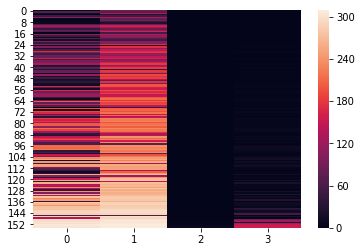

In [89]:
sns.heatmap(row_linkage)

In [90]:
fcluster = hierarchy.fcluster(row_linkage, t=1)
np.set_printoptions(threshold=np.nan)
print(fcluster)

[23 43 46  3 29 21 47 41 14 33 47 36  4 11 46 19 15 12 26 15  3 33 24 36
  2 11 47 44 46 20 48 48 18 25 40 13  9 10 47 17 38  2 28 25 20  3 22 33
 46 10 21 37 37 12 22 43 39 15 34 14  1 44 16  1 27 29 40 40  2 12 21 16
 12 24 16 29 28 14  2 11 33 25 44 32 25 14 23 46 46 41 14  5 33 25 39 15
 15  7 12 47 35 36 15  8 25 25  6 30 24 25 37 47 46 14 35 37 39  5 12 45
 10 31 44 42  8 12 46 35 20 11 17 38  9  3 33 47 35  4 26 46 10 12 48 45
 13 18  9 27 37  2 32 42 34 13 19 17]


In [ ]:
[print()]